<b>Title:</b> Exploratory Data Analysis (EDA)

<b>Purpose:</b> Final Project, whilst studying at GA

<b>Name:</b> Razvan D.

<b>Introduction</b>

Final 

LendingClub is the world's largest peer-to-peer lending platform. It is headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the SEC, and to offer loan trading on a secondary market.

<b>Business Understanding</b>

When LendingClub receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. 
Two types of risks are associated with the bank's decision:

1) If the applicant is likely to repay the loan, by not approving the loan, it results in a loss of business to the company.
2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data available contains various features about past loan applcations and whether one defaulted or not. The aim is to identify patterns which indicate if one is likely to default, which can be utilised for taking actions such as denying the loan, reducing the amount of loan, and potentially lending at higher interest rates for risky applicants.

When an applicant applies for a loan, there are two types of decisions that could be made:
1) Loan gets accepted - If the loan is approved, there are three possible scenarios:
- Fully paid: The loan is fully paid, principal and interest rate.
- Current: The loan is in the process of being paid in instalments.
- Charged-off: The instalments have not been paid for a long period of time, i.e. he/she has defaulted on the loan.
2) Loan gets rejected - The loan applicant gets rejected due to not meeting the requiements etc.

<b>Case Study Objectives/Hypothesis</b>

- The aim of this case study is to identify risky loan applicants using EDA and Machine Learning. In other words, the aim is to understand if someone is going to default on their loan (Charged Off) or pay it back in full (Fully Paid).

<b> 1) Exploratory Data Analysis (EDA) </b>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas
# from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)

pd.set_option("display.float", "{:.2f}".format)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)


C:\Users\rd\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading the data for the dictionary, explaning the various features of the data
dic = pd.read_csv("lc_dictionary.csv")

# aligning the data
left_aligned_dic = dic.style.set_properties(**{"text-align":"left"})
left_aligned_dic = left_aligned_dic.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

# displaying the data
display(left_aligned_dic)


In [3]:
# reading the data
data = pd.read_csv("lc_data.csv")


In [4]:
# viewing data head
data.head()


loan_amnt        term  int_rate  installment grade sub_grade  \
0   10000.00   36 months     11.44       329.48     B        B4   
1    8000.00   36 months     11.99       265.68     B        B5   
2   15600.00   36 months     10.49       506.97     B        B3   
3    7200.00   36 months      6.49       220.65     A        A2   
4   24375.00   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT   117000.00   
1          Credit analyst     4 years       MORTGAGE    65000.00   
2             Statistician   < 1 year           RENT    43057.00   
3          Client Advocate    6 years           RENT    54000.00   
4  Destiny Management Inc.    9 years       MORTGAGE    55000.00   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title   dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation 26.24         Jun-1990     16.00     0.00   
1       Debt consolidation 22.05         Jul-2004     17.00     0.00   
2  Credit card refinancing 12.79         Aug-2007     13.00     0.00   
3  Credit card refinancing  2.60         Sep-2006      6.00     0.00   
4    Credit Card Refinance 33.95         Mar-1999     13.00     0.00   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0   36369.00       41.80      25.00                   w       INDIVIDUAL   
1   20131.00       53.30      27.00                   f       INDIVIDUAL   
2   11987.00       92.20      26.00                   f       INDIVIDUAL   
3    5472.00       21.50      13.00                   f       INDIVIDUAL   
4   24584.00       69.80      43.00                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0      0.00                  0.00   
1      3.00                  0.00   
2      0.00                  0.00   
3      0.00                  0.00   
4      1.00                  0.00   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [5]:
# obtaining descriptive statistics of all numerical columns within the data set
data.describe()


loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
count  396030.00 396030.00    396030.00   396030.00 396030.00 396030.00   
mean    14113.89     13.64       431.85    74203.18     17.38     11.31   
std      8357.44      4.47       250.73    61637.62     18.02      5.14   
min       500.00      5.32        16.08        0.00      0.00      0.00   
25%      8000.00     10.49       250.33    45000.00     11.28      8.00   
50%     12000.00     13.33       375.43    64000.00     16.91     10.00   
75%     20000.00     16.49       567.30    90000.00     22.98     14.00   
max     40000.00     30.99      1533.81  8706582.00   9999.00     90.00   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
count 396030.00  396030.00   395754.00  396030.00 358235.00   
mean       0.18   15844.54       53.79      25.41      1.81   
std        0.53   20591.84       24.45      11.89      2.15   
min        0.00       0.00        0.00       2.00      0.00   
25%        0.00    6025.00       35.80      17.00      0.00   
50%        0.00   11181.00       54.80      24.00      1.00   
75%        0.00   19620.00       72.90      32.00      3.00   
max       86.00 1743266.00      892.30     151.00     34.00   

       pub_rec_bankruptcies  
count             395495.00  
mean                   0.12  
std                    0.36  
min                    0.00  
25%                    0.00  
50%                    0.00  
75%                    0.00  
max                    8.00

In [6]:
# looking at the info to identify if we are any NULL value for any of the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
# looking at the current status of the loan
data["loan_status"].value_counts().hvplot.bar(
    title="Loan Status Counts", 
    xlabel="Loan Status", 
    ylabel="Count", 
    width=500, 
    height=350
)


:Bars   [index]   (loan_status)

<AxesSubplot:>

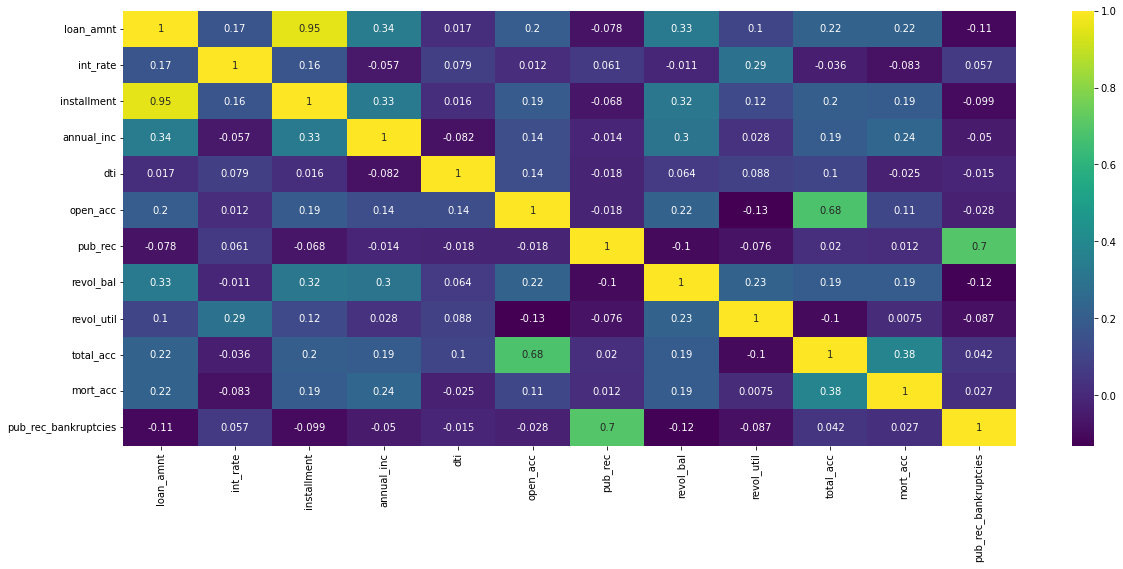

In [8]:
# looking at the correlations
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True, cmap="viridis")


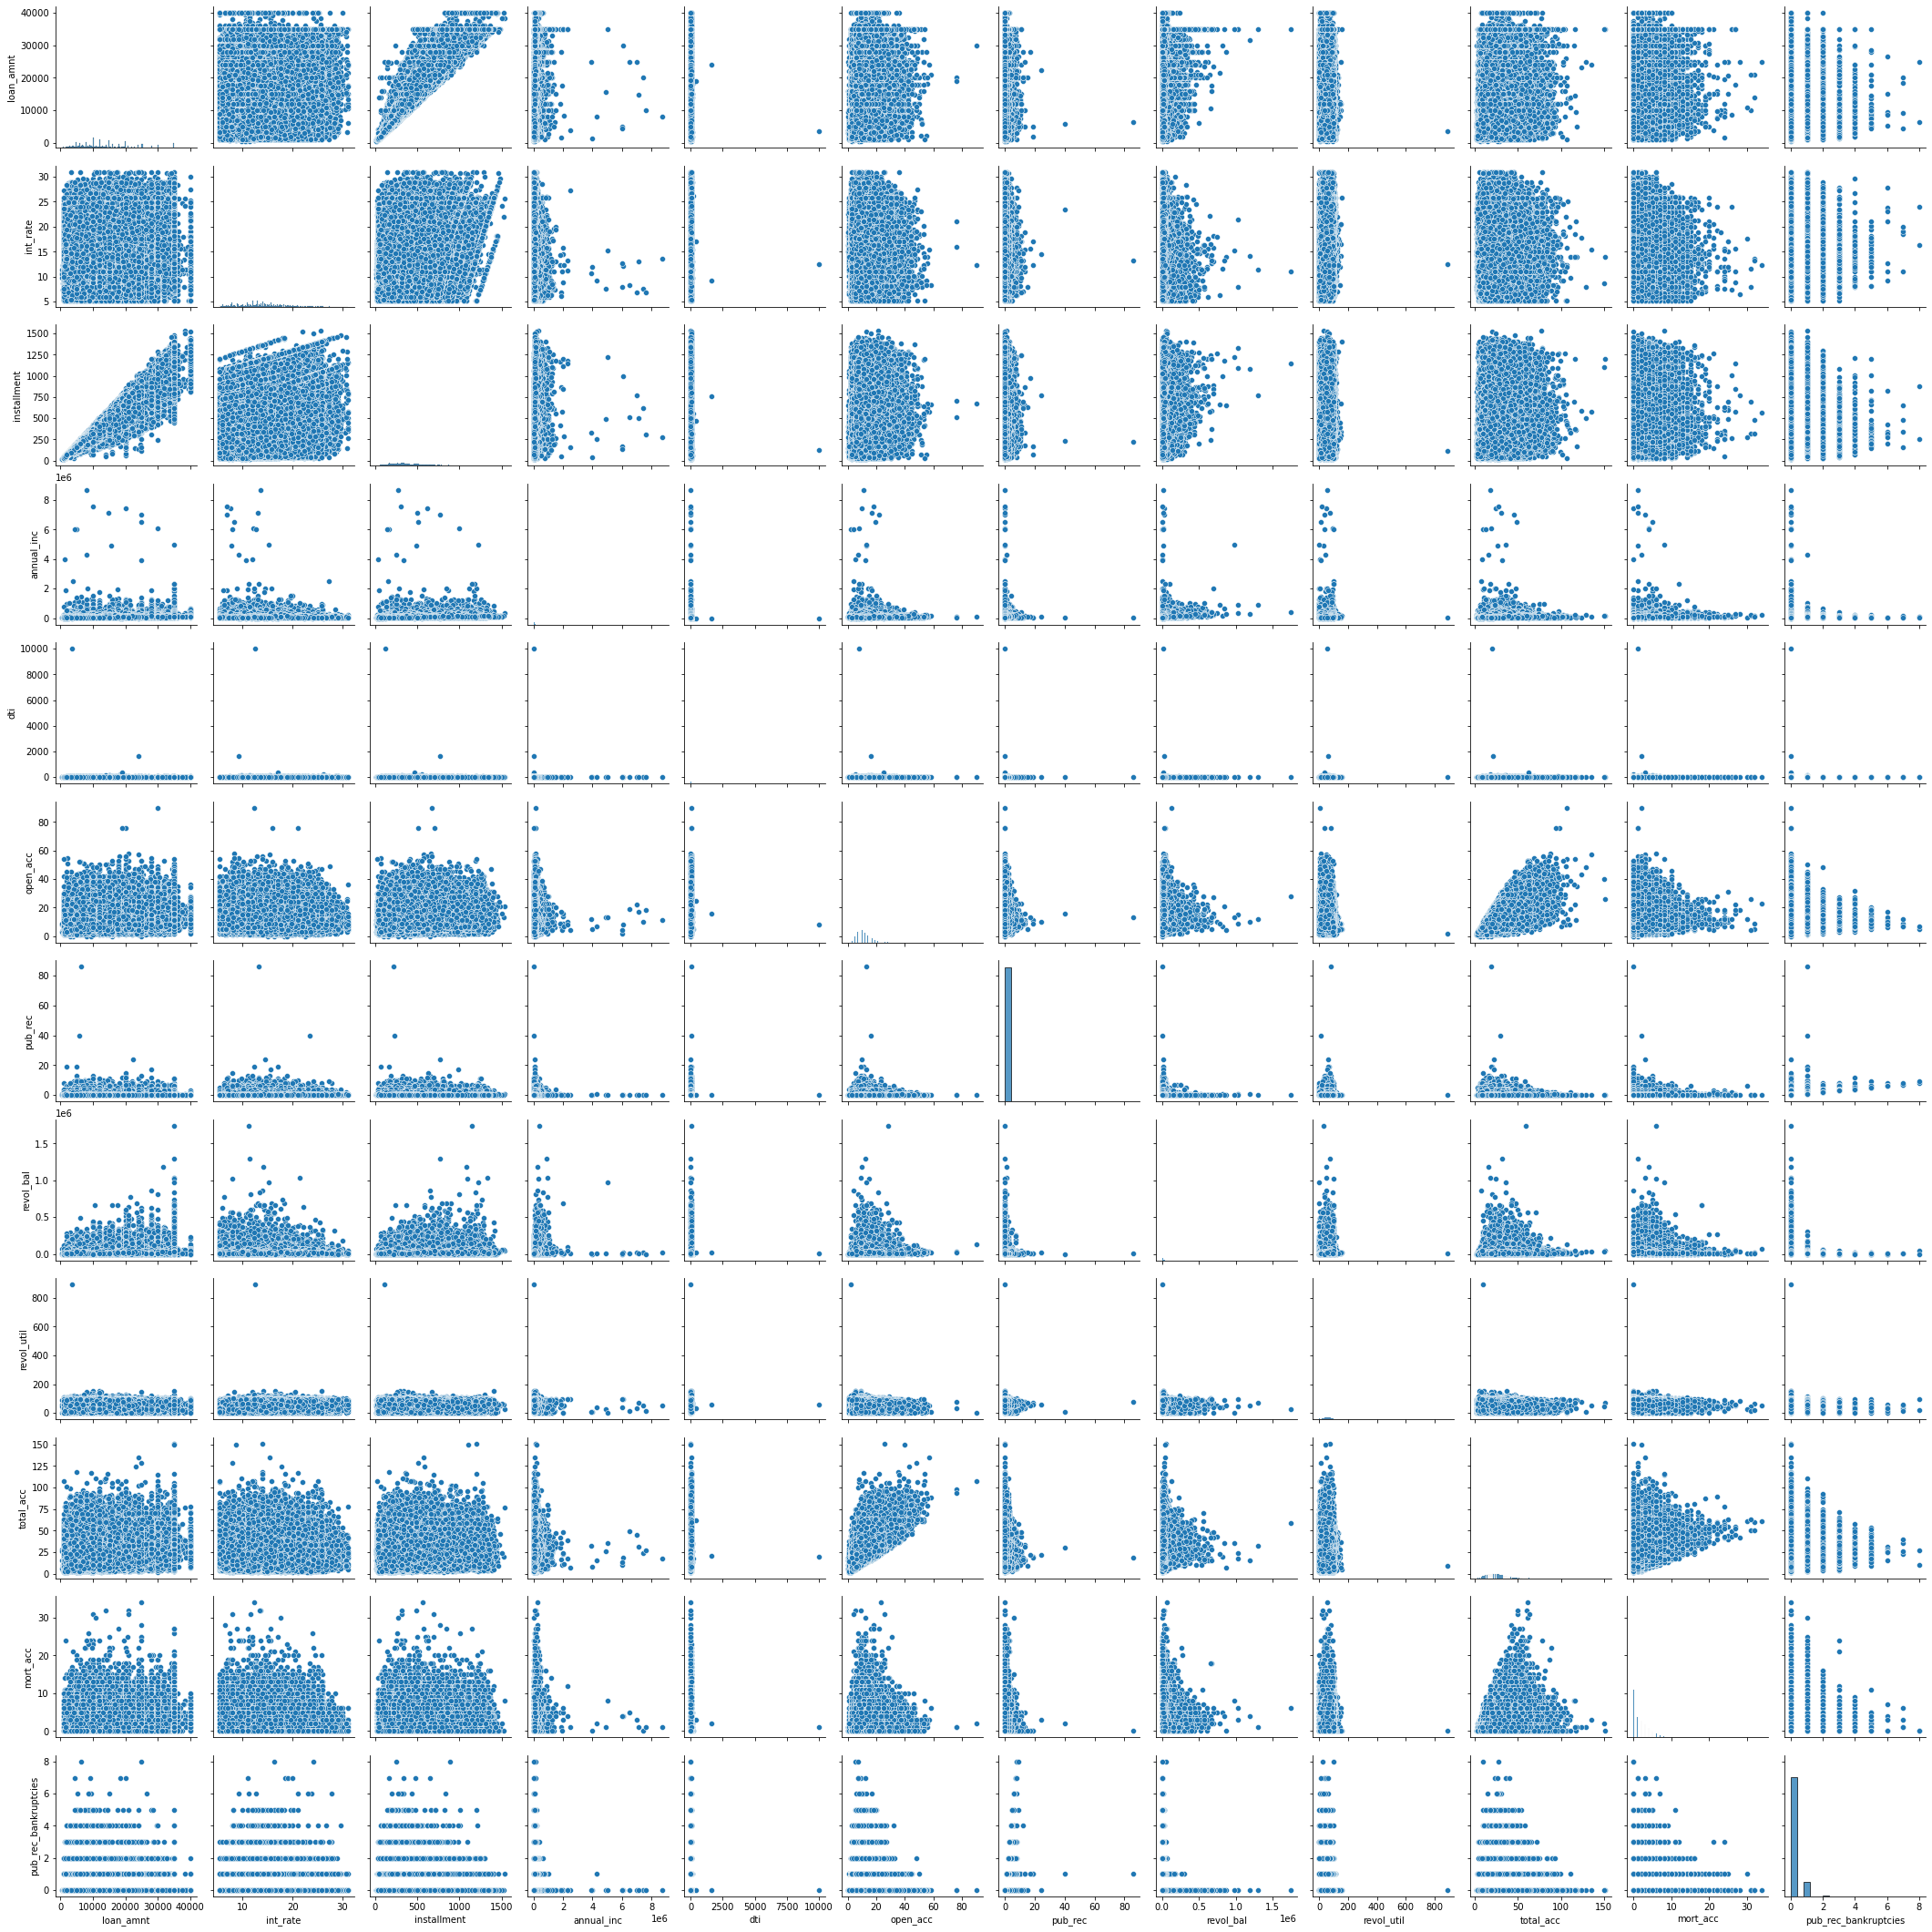

In [9]:
# plotting visually 
sns.pairplot(data);


In [10]:
data.corr()["loan_amnt"].sort_values(ascending=False)


loan_amnt               1.00
installment             0.95
annual_inc              0.34
revol_bal               0.33
total_acc               0.22
mort_acc                0.22
open_acc                0.20
int_rate                0.17
revol_util              0.10
dti                     0.02
pub_rec                -0.08
pub_rec_bankruptcies   -0.11
Name: loan_amnt, dtype: float64

Looking at the above, there seems to be almost a perfect correlation between the "loan_amnt" and the "installment" feature.

In [11]:
# viewing histograms for loan amount and installement feature, exploring further, given the above high correlation between the features
installment = data.hvplot.hist(
    y="installment", by="loan_status", subplots=False, 
    width=340, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel="Installment", ylabel="Counts", legend="top"
)

loan_amnt = data.hvplot.hist(
    y="loan_amnt", by="loan_status", subplots=False, 
    width=340, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel="Loan Amount", ylabel="Counts", legend="top"
)

installment + loan_amnt


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [12]:
# exploring the descriptive statistics, grouped by loan status
data.groupby(by="loan_status")["loan_amnt"].describe()


count     mean     std     min     25%      50%      75%  \
loan_status                                                                
Charged Off  77673.00 15126.30 8505.09 1000.00 8525.00 14000.00 20000.00   
Fully Paid  318357.00 13866.88 8302.32  500.00 7500.00 12000.00 19225.00   

                 max  
loan_status           
Charged Off 40000.00  
Fully Paid  40000.00

In [13]:
# printing the unique values for grades and sub-grades
print(f"Unique Grades: {data.grade.unique()}")
print(f"Unique Sub_Grades: {data.sub_grade.unique()}")


Unique Grades: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Unique Sub_Grades: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [14]:
# viewing the count for grade, for fully paid
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "grade"].value_counts().hvplot.bar() 
fully_paid


:Bars   [index]   (grade)

In [15]:
# viewing the count for grade, for charged off
charged_off = data.loc[data["loan_status"]=="Charged Off", "grade"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (grade)

In [16]:
# viewing the count for sub_grade fully paid
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "sub_grade"].value_counts().hvplot.bar()
fully_paid


:Bars   [index]   (sub_grade)

In [17]:
# viewing the count for sub_grade for charged off
charged_off = data.loc[data["loan_status"]=="Charged Off", "sub_grade"].value_counts().hvplot.bar() 
charged_off


:Bars   [index]   (sub_grade)

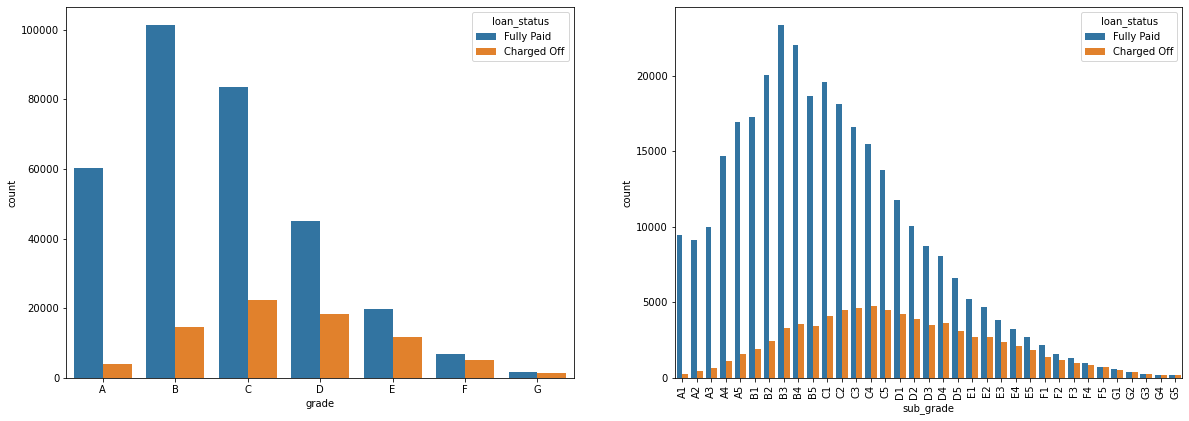

In [18]:
# viewing the grade and sub-grade by loan status
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x="grade", data=data, hue="loan_status", order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x="sub_grade", data=data, hue="loan_status", order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


Looking at the above, it looks like grades F and G do not get paid back that often in comparison to the others.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

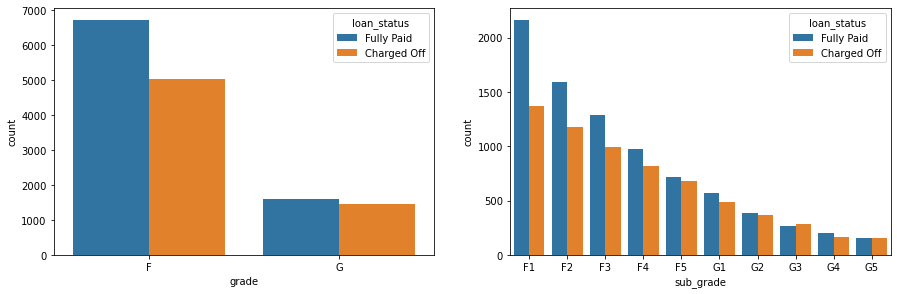

In [19]:
# given the above, plotting grades F and G
df = data[(data.grade == "F") | (data.grade == "G")]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x="grade", data=df, hue="loan_status", order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x="sub_grade", data=df, hue="loan_status", order=sub_grade)


Exploring also other features, such as term, home_ownership, verification_status and purpose.

In [20]:
# counting by home ownership, including fully paid and charged off
data["home_ownership"].value_counts()


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [21]:
# viewing count for fully paid, for home ownership feature
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "home_ownership"].value_counts().hvplot.bar() 
fully_paid


:Bars   [index]   (home_ownership)

In [22]:
# viewing count for charged off, for home ownership
charged_off = data.loc[data["loan_status"]=="Charged Off", "home_ownership"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (home_ownership)

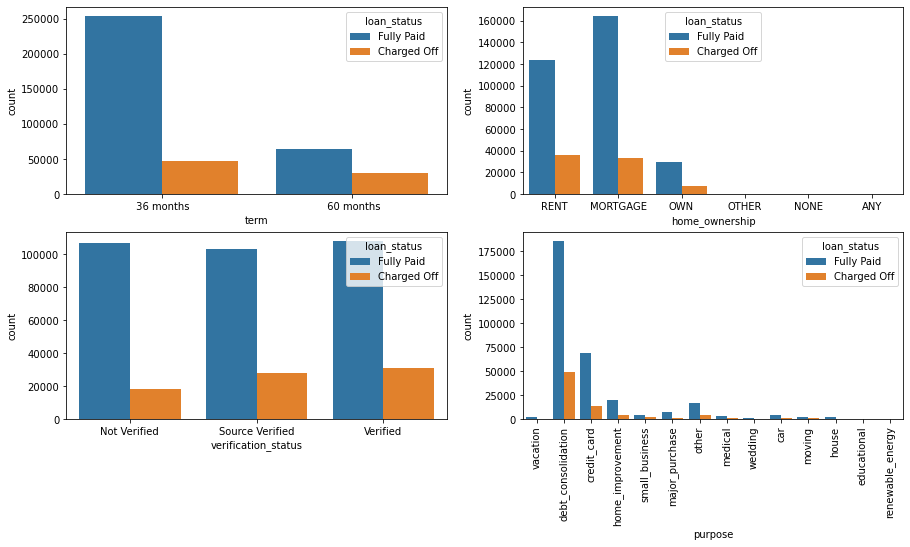

In [23]:
# plotting visually the features of term, home ownership, verification status and purpose, by loan status
plt.figure(figsize=(15, 20))

plt.subplot(5, 2, 1)
sns.countplot(x="term", data=data, hue="loan_status")

plt.subplot(5, 2, 2)
sns.countplot(x="home_ownership", data=data, hue="loan_status")

plt.subplot(5, 2, 3)
sns.countplot(x="verification_status", data=data, hue="loan_status")

plt.subplot(5, 2, 4)
g = sns.countplot(x="purpose", data=data, hue="loan_status")
g.set_xticklabels(g.get_xticklabels(), rotation=90);


Exploring also int_rate and annual_inc features.

In [24]:
# plotting interest rate distribution
int_rate = data.hvplot.hist(
    y="int_rate", by="loan_status", alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel="Interest Rate", ylabel="Loans Counts", 
    legend="top"
)

int_rate


:NdOverlay   [loan_status]
   :Histogram   [int_rate]   (int_rate_count)

<AxesSubplot:xlabel='loan_status'>

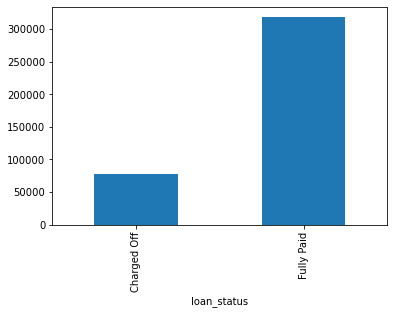

In [25]:
# plotting annual income
annual_income = data.groupby("loan_status").annual_inc.count()
annual_income.plot(kind="bar")


In [26]:
# plotting annual income distribution less or equal to 250k
data[data.annual_inc <= 250000].hvplot.hist(
    y="annual_inc", by="loan_status", bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel="Annual Income", ylabel="Loans Counts", legend="top"
).opts(xrotation=45)


:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

Exploring also employment title declared by the borrower when making the application, and employment length, values could be from 0 to 10 years.

In [27]:
# viewing the employment title counts
data["emp_title"].value_counts()[:20]


Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

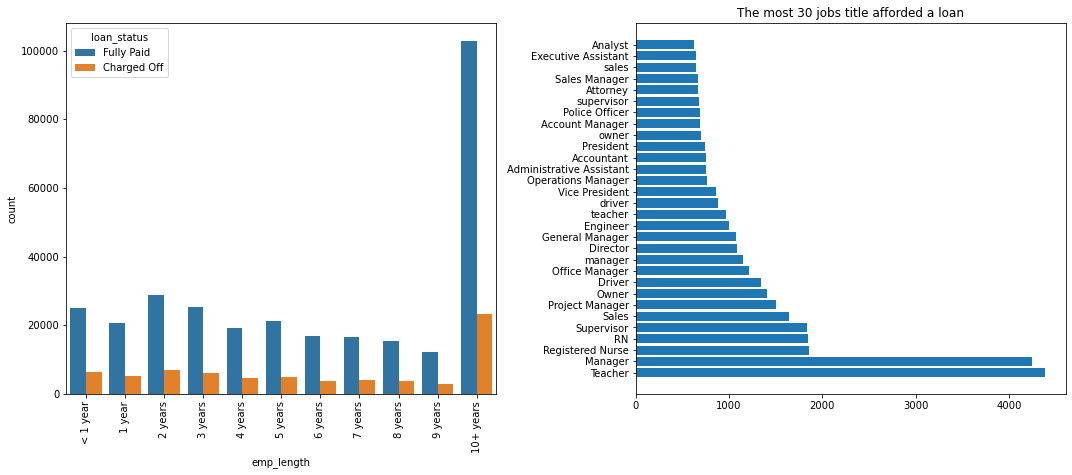

In [28]:
# plotting employment length in years and 30 jobs titles that afforded a loan
plt.figure(figsize=(15, 12))

# plotting employment length
plt.subplot(2, 2, 1)
order = ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", 
          "6 years", "7 years", "8 years", "9 years", "10+ years",]
g = sns.countplot(x="emp_length", data=data, hue="loan_status", order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

# plotting jobs titles that afforded a loan
plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()


Exploring also issue_d, which is the month the loan was funded, and earliest_cr_line, which is the month the borrower's earlier reported credit line was opened. Also title.

In [29]:
# viewing the earliest credit line counts
data["earliest_cr_line"].value_counts()


Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [30]:
# viewing the title value counts
data.title.value_counts()[:20]


Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

Exploring further the following:
- dti, which is a ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LendingClub's loan, divided by the borrower's self-reported monthly income.
- open_acc, which is the number of credit lines on the borrowers credit file.
- revol_bal, total credit revolving balance.
- revol_util, revolving line utilisation rate, or in other words, the amount of credit the borrower is using relative to all available revolving credit.
- total_acc, the total number of credit lines currently in the borrower's credit file.

In [31]:
# viewing the dti value counts
data.dti.value_counts()


0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [32]:
# plotting distributions for dti and dti <=30
dti = data.hvplot.hist(
    y="dti", bins=50, width=350, height=350, 
    title="dti Distribution", xlabel="dti", ylabel="Count"
)

sub_dti = data[data["dti"]<=50].hvplot.hist(
    y="dti", bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel="dti", ylabel="Count", shared_axes=False
)

dti + sub_dti


:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [33]:
# viewing the shape for dti >=40
print(data[data["dti"]>=40].shape)


(296, 27)


In [34]:
# viewing the dti >=50 by loan status, counts
data.loc[data["dti"]>=50, "loan_status"].value_counts()


Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

In [35]:
data.dti.describe()

count   396030.00
mean        17.38
std         18.02
min          0.00
25%         11.28
50%         16.91
75%         22.98
max       9999.00
Name: dti, dtype: float64

In [36]:
# viewing the distributions for dti <=30, open_acc and total_acc by loan status
dti = data[data["dti"]<=50].hvplot.hist(
    y="dti", by="loan_status", bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel="dti", ylabel="Count", 
    alpha=0.3, legend="top"
)

title="Loan Status by The number of open credit lines"

open_acc = data.hvplot.hist(
    y="open_acc", by="loan_status", bins=50, width=300, height=350, 
    title=title, xlabel="The number of open credit lines", ylabel="Count", 
    alpha=0.4, legend="top"
)

title="Loan Status by The total number of credit lines"

total_acc = data.hvplot.hist(
    y="total_acc", by="loan_status", bins=50, width=300, height=350, 
    title=title, xlabel="The total number of credit lines", ylabel="Count", 
    alpha=0.4, legend="top"
)

dti + open_acc + total_acc


:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [37]:
# printing the data shape for open_acc >40
print(data.shape)
print(data[data.open_acc > 40].shape)


(396030, 27)
(217, 27)


In [38]:
# printing the data shape for total_acc > 80
print(data.shape)
print(data[data.total_acc > 80].shape)


(396030, 27)
(266, 27)


In [39]:
# printing data shape for revol_util > 120
print(data.shape)
print(data[data.revol_util > 120].shape)


(396030, 27)
(27, 27)


In [40]:
# viewing distribution for revol_util and <120
title="Loan Status by Revolving line utilization rate"

revol_util = data.hvplot.hist(
    y="revol_util", by="loan_status", bins=50, width=350, height=400, 
    title=title, xlabel="Revolving line utilization rate", ylabel="Count", 
    alpha=0.4, legend="top"
)

title="Loan Status by Revolving line utilization rate (<120)"

sub_revol_util = data[data.revol_util < 120].hvplot.hist(
    y="revol_util", by="loan_status", bins=50, width=350, height=400, 
    title=title, xlabel="Revolving line utilization rate", ylabel="Count", 
    shared_axes=False, alpha=0.4, legend="top"
)

revol_util + sub_revol_util


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [41]:
# viewing revol_util > 200 data head
data[data.revol_util > 200]


loan_amnt        term  int_rate  installment grade sub_grade  \
137211    3500.00   36 months     12.49       117.08     B        B4   

             emp_title emp_length home_ownership  annual_inc  \
137211  Budget Analyst  10+ years           RENT    45000.00   

       verification_status   issue_d loan_status             purpose  \
137211            Verified  Apr-2014  Fully Paid  debt_consolidation   

                     title   dti earliest_cr_line  open_acc  pub_rec  \
137211  Debt consolidation 14.67         Oct-1998      2.00     0.00   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
137211    2677.00      892.30       9.00                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
137211      0.00                  0.00   

                                             address  
137211  12506 Connie Burg\r\nVelasquezfort, TN 00813

In [42]:
# viewing the data shape and revol_bal > 250k
print(data.shape)
print(data[data.revol_bal > 250000].shape)


(396030, 27)
(397, 27)


In [43]:
# plotting distributions for revol_bal and <=250k
title = "Loan Status by Total credit revolving balance"

revol_bal = data.hvplot.hist(
    y="revol_bal", by="loan_status", bins=50, width=350, height=400, 
    title=title, xlabel="Total credit revolving balance", ylabel="Count", 
    alpha=0.4, legend="top"
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = data[data["revol_bal"]<=250000].hvplot.hist(
    y="revol_bal", by="loan_status", bins=50, width=350, height=400, 
    title=title, xlabel="Total credit revolving balance", ylabel="Count", 
    alpha=0.4, legend="top", shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

In [44]:
# viewing count for revol_bal > 250k by loan status
data.loc[data.revol_bal > 250000, "loan_status"].value_counts()


Fully Paid     351
Charged Off     46
Name: loan_status, dtype: int64

- It seems that the smaller the dti, the more likely that the loan will not be paid.
- Only 217 borrowers have more than 40 open credit lines.
- Only 266 borrowers have more than 80 credit lines in the borrowers credit file.

Also exploring the following features:
- pub_rec: number of derogatory public records
- initial_list_status: the initial listing status of the loan. Possible values are W and F
- application_type: indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc: number of mortgage accounts
- pub_rec_bankruptcies: number of public record bankruptcies


In [45]:
# viewing loan status for fully paid, for pub_rec, counts
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "pub_rec"].value_counts().hvplot.bar() 
fully_paid


:Bars   [index]   (pub_rec)

In [46]:
# viewing loan status for charged off, for pub_rec, counts
charged_off = data.loc[data["loan_status"]=="Charged Off", "pub_rec"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (pub_rec)

In [47]:
# viewing loan status, fully paid, for initial_list_status, counts
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "initial_list_status"].value_counts().hvplot.bar() 
fully_paid


:Bars   [index]   (initial_list_status)

In [48]:
# viewing loan status, charged off, for initial_list_status, counts
charged_off = data.loc[data["loan_status"]=="Charged Off", "initial_list_status"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (initial_list_status)

In [49]:
# viewing loan status, fully paid, for application_type, counts
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "application_type"].value_counts().hvplot.bar()
fully_paid


:Bars   [index]   (application_type)

In [50]:
# viewing loan status, charged off, for application_type, counts
charged_off = data.loc[data["loan_status"]=="Charged Off", "application_type"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (application_type)

In [51]:
# viewing loan status, fully paid, for pub_rec_bankruptcies, count
fully_paid = data.loc[data["loan_status"]=="Fully Paid", "pub_rec_bankruptcies"].value_counts().hvplot.bar() 
fully_paid


:Bars   [index]   (pub_rec_bankruptcies)

In [52]:
# viewing loan status, charged off, for pub_rec_bankrupticies, count
charged_off = data.loc[data["loan_status"]=="Charged Off", "pub_rec_bankruptcies"].value_counts().hvplot.bar()
charged_off


:Bars   [index]   (pub_rec_bankruptcies)

Conclusion: it is noticed after doing the EDA, there are two types of features within the data:
1) features relating to the borrower, such as occupation, employment etc.
2) features related to loan characteristics, such as loan amount, interest rate, purpose of the loan etc.

<b> 2) Data Wrangling: Cleansing and Feature Selection </b>
- The aim here is to identify any outliers and then make a decision to either remove or fill any missing data.

In [53]:
# viewing data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


Text(0.5, 1.0, 'Number of null values per column')

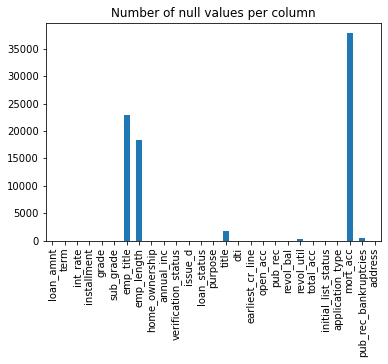

In [54]:
# illustrating the count of missing values in each column and plotting to visualise
print((data.isnull().sum()))
data.isnull().sum().plot(kind="bar")
plt.title("Number of null values per column")


In [55]:
# viewing the data shape of each column
print(data.emp_title.shape)
print(data.emp_length.shape)
print(data.title.shape)
print(data.revol_util.shape)
print(data.mort_acc.shape)
print(data.pub_rec_bankruptcies.shape)


(396030,)
(396030,)
(396030,)
(396030,)
(396030,)
(396030,)


In [56]:
# calculating the percentage of missing values from the columns that have missing data
percent_missing = data.isnull().sum() / len(data) * 100
x = percent_missing[percent_missing>0].sort_values(ascending=False)

# percent_missing.plot(kind="bar")

<AxesSubplot:>

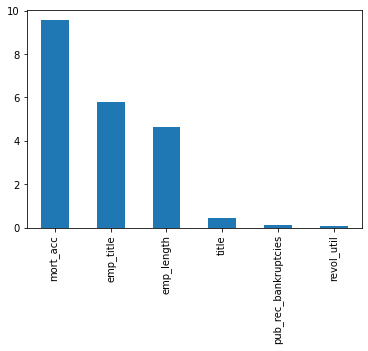

In [57]:
x.plot(kind="bar")

In [58]:
# creating a new data frame prior to filling-in NULL values
# Can either: 1) drop the observation (row), 2) drop the attribute (column), 3) inpute a value for that specific attribute and observation (estimate a value)
new_data = data.copy(deep=True)


In [59]:
# checking NULL values for features
new_data.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

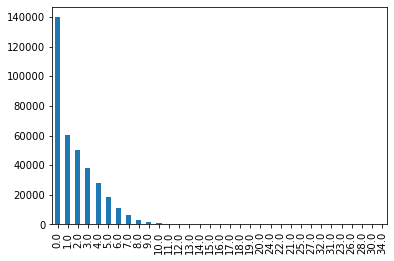

In [60]:
# plotting mort_acc value counts
new_data.mort_acc.value_counts().plot(kind='bar');


In [61]:
new_data.mort_acc.describe()

count   358235.00
mean         1.81
std          2.15
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         34.00
Name: mort_acc, dtype: float64

In [62]:
# looking at % of NULL values for mort_acc
new_data.mort_acc.value_counts(normalize=True)


0.00    0.39
1.00    0.17
2.00    0.14
3.00    0.11
4.00    0.08
5.00    0.05
6.00    0.03
7.00    0.02
8.00    0.01
9.00    0.00
10.00   0.00
11.00   0.00
12.00   0.00
13.00   0.00
14.00   0.00
15.00   0.00
16.00   0.00
17.00   0.00
18.00   0.00
19.00   0.00
20.00   0.00
24.00   0.00
22.00   0.00
21.00   0.00
25.00   0.00
27.00   0.00
32.00   0.00
31.00   0.00
23.00   0.00
26.00   0.00
28.00   0.00
30.00   0.00
34.00   0.00
Name: mort_acc, dtype: float64

In [63]:
# did not assume the median, as only circa 17% of the value counts fell within this category
new_data.mort_acc.median()


1.0

In [64]:
# assumed 0, given that most value counts equates to 0 from the dataset, circa 39%
new_data.mort_acc.fillna(value="0", inplace=True)


In [65]:
# checking to see if mort_acc has been filled-in
new_data.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [66]:
# exploring employment title
new_data.emp_title.value_counts()


Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [67]:
# decided to drop the entire employment title column, as it was hard to fill-in a specific title from other features
new_data.drop("emp_title", axis=1, inplace=True)


In [68]:
# checking to see if emp_title has been dropped
new_data.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [69]:
# decided to drop the entire title column, as it was hard to fill-in a specific title from other features
new_data.drop("title", axis=1, inplace=True)


In [70]:
# checking to see if title has been dropped
new_data.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [71]:
# viewing the mode of the emp_length feature
new_data.emp_length.mode()


0    10+ years
Name: emp_length, dtype: object

In [72]:
# decided to fill-in with the mode given most common
new_data.emp_length.fillna(value="10 + years", inplace=True)


In [73]:
# checking to see if emp_length has been filled-in
new_data.isnull().sum()


loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [74]:
# decided to fill in with 0, given representing such a small % of the dataset
new_data.pub_rec_bankruptcies.fillna(value="0", inplace=True)
new_data.revol_util.fillna(value="0", inplace=True)


In [75]:
# checking to see if revol_util and pub_rec_bankruptcies have been filled-in
new_data.isnull().sum()


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [76]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [77]:
# setting the index to be application type
new_data.set_index(["application_type"], inplace=True)


In [78]:
new_data.head()

loan_amnt        term  int_rate  installment grade  \
application_type                                                       
INDIVIDUAL         10000.00   36 months     11.44       329.48     B   
INDIVIDUAL          8000.00   36 months     11.99       265.68     B   
INDIVIDUAL         15600.00   36 months     10.49       506.97     B   
INDIVIDUAL          7200.00   36 months      6.49       220.65     A   
INDIVIDUAL         24375.00   60 months     17.27       609.33     C   

                 sub_grade emp_length home_ownership  annual_inc  \
application_type                                                   
INDIVIDUAL              B4  10+ years           RENT   117000.00   
INDIVIDUAL              B5    4 years       MORTGAGE    65000.00   
INDIVIDUAL              B3   < 1 year           RENT    43057.00   
INDIVIDUAL              A2    6 years           RENT    54000.00   
INDIVIDUAL              C5    9 years       MORTGAGE    55000.00   

                 verification_status   issue_d  loan_status  \
application_type                                              
INDIVIDUAL              Not Verified  Jan-2015   Fully Paid   
INDIVIDUAL              Not Verified  Jan-2015   Fully Paid   
INDIVIDUAL           Source Verified  Jan-2015   Fully Paid   
INDIVIDUAL              Not Verified  Nov-2014   Fully Paid   
INDIVIDUAL                  Verified  Apr-2013  Charged Off   

                             purpose   dti earliest_cr_line  open_acc  \
application_type                                                        
INDIVIDUAL                  vacation 26.24         Jun-1990     16.00   
INDIVIDUAL        debt_consolidation 22.05         Jul-2004     17.00   
INDIVIDUAL               credit_card 12.79         Aug-2007     13.00   
INDIVIDUAL               credit_card  2.60         Sep-2006      6.00   
INDIVIDUAL               credit_card 33.95         Mar-1999     13.00   

                  pub_rec  revol_bal revol_util  total_acc  \
application_type                                             
INDIVIDUAL           0.00   36369.00      41.80      25.00   
INDIVIDUAL           0.00   20131.00      53.30      27.00   
INDIVIDUAL           0.00   11987.00      92.20      26.00   
INDIVIDUAL           0.00    5472.00      21.50      13.00   
INDIVIDUAL           0.00   24584.00      69.80      43.00   

                 initial_list_status mort_acc pub_rec_bankruptcies  \
application_type                                                     
INDIVIDUAL                         w     0.00                 0.00   
INDIVIDUAL                         f     3.00                 0.00   
INDIVIDUAL                         f     0.00                 0.00   
INDIVIDUAL                         f     0.00                 0.00   
INDIVIDUAL                         f     1.00                 0.00   

                                                            address  
application_type                                                     
INDIVIDUAL           0174 Michelle Gateway\r\nMendozaberg, OK 22690  
INDIVIDUAL        1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
INDIVIDUAL        87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
INDIVIDUAL                  823 Reid Ford\r\nDelacruzside, MA 00813  
INDIVIDUAL                   679 Luna Roads\r\nGreggshire, VA 11650

In [79]:
# exporting data for modelling
new_data.to_csv("model_v2.csv")
